# RAG & Embeddings & Vector Store

## üí° ËøôËäÇËØæ‰ºöÂ∏¶Áªô‰Ω†

1. Â¶Ç‰ΩïÁî®‰Ω†ÁöÑÂûÇÂüüÊï∞ÊçÆË°•ÂÖÖ LLM ÁöÑËÉΩÂäõ
2. Â¶Ç‰ΩïÊûÑÂª∫‰Ω†ÁöÑÂûÇÂüüÔºàÂêëÈáèÔºâÁü•ËØÜÂ∫ì
3. Êê≠Âª∫‰∏ÄÂ•óÂÆåÊï¥ RAG Á≥ªÁªüÈúÄË¶ÅÂì™‰∫õÊ®°Âùó
4. Êê≠Âª∫ RAG Á≥ªÁªüÊó∂Êõ¥Â§öÁöÑÊúâÁî®ÊäÄÂ∑ß

## ‰∏Ä„ÄÅ‰ªÄ‰πàÊòØÊ£ÄÁ¥¢Â¢ûÂº∫ÁöÑÁîüÊàêÊ®°ÂûãÔºàRAGÔºâ

### 1.1 Â§ßÊ®°ÂûãÁõÆÂâçÂõ∫ÊúâÁöÑÂ±ÄÈôêÊÄß

1. LLMÁöÑÁü•ËØÜ‰∏çÊòØÂÆûÊó∂ÁöÑ
2. LLM ÂèØËÉΩ‰∏çÁü•ÈÅì‰Ω†ÁßÅÊúâÁöÑÈ¢ÜÂüü/‰∏öÂä°Áü•ËØÜ

### 1.2 Ê£ÄÁ¥¢Â¢ûÂº∫ÁîüÊàê

RAGÔºàRetrieval Augmented GenerationÔºâÈ°æÂêçÊÄù‰πâÔºåÈÄöËøá**Ê£ÄÁ¥¢**ÁöÑÊñπÊ≥ïÊù•Â¢ûÂº∫**ÁîüÊàêÊ®°Âûã**ÁöÑËÉΩÂäõ„ÄÇ

<video src="./assets/RAG.mp4" controls="controls" width=1024px style="margin-left: 0px"></video>

<div class="alert alert-success">
<b>Á±ªÊØîÔºö</b>‰Ω†ÂèØ‰ª•ÊääËøô‰∏™ËøáÁ®ãÊÉ≥Ë±°ÊàêÂºÄÂç∑ËÄÉËØï„ÄÇËÆ© LLM ÂÖàÁøª‰π¶ÔºåÂÜçÂõûÁ≠îÈóÆÈ¢ò„ÄÇ
</div>

## ‰∫å„ÄÅRAGÁ≥ªÁªüÁöÑÂü∫Êú¨Êê≠Âª∫ÊµÅÁ®ã

<img src="./assets/rag.png" style="margin-left: 0px" width=1024px>

Êê≠Âª∫ËøáÁ®ãÔºö

1. ÊñáÊ°£Âä†ËΩΩÔºåÂπ∂Êåâ‰∏ÄÂÆöÊù°‰ª∂**ÂàáÂâ≤**ÊàêÁâáÊÆµ
2. Â∞ÜÂàáÂâ≤ÁöÑÊñáÊú¨ÁâáÊÆµÁÅåÂÖ•**Ê£ÄÁ¥¢ÂºïÊìé**
3. Â∞ÅË£Ö**Ê£ÄÁ¥¢Êé•Âè£**
4. ÊûÑÂª∫**Ë∞ÉÁî®ÊµÅÁ®ã**ÔºöQuery -> Ê£ÄÁ¥¢ -> Prompt -> LLM -> ÂõûÂ§ç


### 2.1 ÊñáÊ°£ÁöÑÂä†ËΩΩ‰∏éÂàáÂâ≤

In [27]:
# !pip install --upgrade openai

In [28]:
# ÂÆâË£Ö pdf Ëß£ÊûêÂ∫ì
# !pip install pdfminer.six

In [29]:
from pdfminer.high_level import extract_pages
from pdfminer.layout import LTTextContainer

In [30]:
def extract_text_from_pdf(filename, page_numbers=None, min_line_length=1):
    '''‰ªé PDF Êñá‰ª∂‰∏≠ÔºàÊåâÊåáÂÆöÈ°µÁ†ÅÔºâÊèêÂèñÊñáÂ≠ó'''
    paragraphs = []
    buffer = ''
    full_text = ''
    # ÊèêÂèñÂÖ®ÈÉ®ÊñáÊú¨
    for i, page_layout in enumerate(extract_pages(filename)):
        # Â¶ÇÊûúÊåáÂÆö‰∫ÜÈ°µÁ†ÅËåÉÂõ¥ÔºåË∑≥ËøáËåÉÂõ¥Â§ñÁöÑÈ°µ
        if page_numbers is not None and i not in page_numbers:
            continue
        for element in page_layout:
            if isinstance(element, LTTextContainer):
                full_text += element.get_text() + '\n'
    # ÊåâÁ©∫Ë°åÂàÜÈöîÔºåÂ∞ÜÊñáÊú¨ÈáçÊñ∞ÁªÑÁªáÊàêÊÆµËêΩ
    lines = full_text.split('\n')
    for text in lines:
        if len(text) >= min_line_length:
            buffer += (' '+text) if not text.endswith('-') else text.strip('-')
        elif buffer:
            paragraphs.append(buffer)
            buffer = ''
    if buffer:
        paragraphs.append(buffer)
    return paragraphs

In [31]:
paragraphs = extract_text_from_pdf("llama2.pdf", min_line_length=10)

for para in paragraphs[:4]:
    print(para+"\n")

 Llama 2: Open Foundation and Fine-Tuned Chat Models

 Hugo Touvron‚àó Louis Martin‚Ä† Kevin Stone‚Ä† Peter Albert Amjad Almahairi Yasmine Babaei Nikolay Bashlykov Soumya Batra Prajjwal Bhargava Shruti Bhosale Dan Bikel Lukas Blecher Cristian Canton Ferrer Moya Chen Guillem Cucurull David Esiobu Jude Fernandes Jeremy Fu Wenyin Fu Brian Fuller Cynthia Gao Vedanuj Goswami Naman Goyal Anthony Hartshorn Saghar Hosseini Rui Hou Hakan Inan Marcin Kardas Viktor Kerkez Madian Khabsa Isabel Kloumann Artem Korenev Punit Singh Koura Marie-Anne Lachaux Thibaut Lavril Jenya Lee Diana Liskovich Yinghai Lu Yuning Mao Xavier Martinet Todor Mihaylov Pushkar Mishra Igor Molybog Yixin Nie Andrew Poulton Jeremy Reizenstein Rashi Rungta Kalyan Saladi Alan Schelten Ruan Silva Eric Michael Smith Ranjan Subramanian Xiaoqing Ellen Tan Binh Tang Ross Taylor Adina Williams Jian Xiang Kuan Puxin Xu Zheng Yan Iliyan Zarov Yuchen Zhang Angela Fan Melanie Kambadur Sharan Narang Aurelien Rodriguez Robert Stojnic Serg

### 2.2 LLMÊé•Âè£Â∞ÅË£Ö

In [32]:
# !pip install -U python-dotenv

In [ ]:
from openai import OpenAI
import os

# Âä†ËΩΩÁéØÂ¢ÉÂèòÈáè
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv(), verbose=True)  # ËØªÂèñÊú¨Âú∞ .env Êñá‰ª∂ÔºåÈáåÈù¢ÂÆö‰πâ‰∫Ü OPENAI_API_KEY

print(os.getenv("OPENAI_API_KEY"))

client = OpenAI()

In [34]:
print(os.getenv("OPENAI_API_KEY"))
print(os.getenv("HF_ENDPOINT"))

sk-wNIsggX71mIS2appi3KdbfY5sWx1T4KvJzBOL4FlrriTRtMu
https://hf-mirror.com


In [35]:
def get_completion(prompt, model="gpt-4o"):
    '''Â∞ÅË£Ö openai Êé•Âè£'''
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0,  # Ê®°ÂûãËæìÂá∫ÁöÑÈöèÊú∫ÊÄßÔºå0 Ë°®Á§∫ÈöèÊú∫ÊÄßÊúÄÂ∞è
    )
    return response.choices[0].message.content

### 2.3 Prompt Ê®°Êùø

In [36]:
def build_prompt(prompt_template, **kwargs):
    '''Â∞Ü Prompt Ê®°ÊùøËµãÂÄº'''
    inputs = {}
    for k, v in kwargs.items():
        if isinstance(v, list) and all(isinstance(elem, str) for elem in v):
            val = '\n\n'.join(v)
        else:
            val = v
        inputs[k] = val
    return prompt_template.format(**inputs)

In [37]:
prompt_template = """
‰Ω†ÊòØ‰∏Ä‰∏™ÈóÆÁ≠îÊú∫Âô®‰∫∫„ÄÇ
‰Ω†ÁöÑ‰ªªÂä°ÊòØÊ†πÊçÆ‰∏ãËø∞ÁªôÂÆöÁöÑÂ∑≤Áü•‰ø°ÊÅØÂõûÁ≠îÁî®Êà∑ÈóÆÈ¢ò„ÄÇ

Â∑≤Áü•‰ø°ÊÅØ:
{context} # Ê£ÄÁ¥¢Âá∫Êù•ÁöÑÂéüÂßãÊñáÊ°£

Áî®Êà∑ÈóÆÔºö
{query} # Áî®Êà∑ÁöÑÊèêÈóÆ

Â¶ÇÊûúÂ∑≤Áü•‰ø°ÊÅØ‰∏çÂåÖÂê´Áî®Êà∑ÈóÆÈ¢òÁöÑÁ≠îÊ°àÔºåÊàñËÄÖÂ∑≤Áü•‰ø°ÊÅØ‰∏çË∂≥‰ª•ÂõûÁ≠îÁî®Êà∑ÁöÑÈóÆÈ¢òÔºåËØ∑Áõ¥Êé•ÂõûÂ§ç"ÊàëÊó†Ê≥ïÂõûÁ≠îÊÇ®ÁöÑÈóÆÈ¢ò"„ÄÇ
ËØ∑‰∏çË¶ÅËæìÂá∫Â∑≤Áü•‰ø°ÊÅØ‰∏≠‰∏çÂåÖÂê´ÁöÑ‰ø°ÊÅØÊàñÁ≠îÊ°à„ÄÇ
ËØ∑Áî®‰∏≠ÊñáÂõûÁ≠îÁî®Êà∑ÈóÆÈ¢ò„ÄÇ
"""

## ‰∏â„ÄÅÂêëÈáèÊ£ÄÁ¥¢

### 3.1 ‰ªÄ‰πàÊòØÂêëÈáè

ÂêëÈáèÊòØ‰∏ÄÁßçÊúâÂ§ßÂ∞èÂíåÊñπÂêëÁöÑÊï∞Â≠¶ÂØπË±°„ÄÇÂÆÉÂèØ‰ª•Ë°®Á§∫‰∏∫‰ªé‰∏Ä‰∏™ÁÇπÂà∞Âè¶‰∏Ä‰∏™ÁÇπÁöÑÊúâÂêëÁ∫øÊÆµ„ÄÇ‰æãÂ¶ÇÔºå‰∫åÁª¥Á©∫Èó¥‰∏≠ÁöÑÂêëÈáèÂèØ‰ª•Ë°®Á§∫‰∏∫ $(x,y)$ÔºåË°®Á§∫‰ªéÂéüÁÇπ $(0,0)$ Âà∞ÁÇπ $(x,y)$ ÁöÑÊúâÂêëÁ∫øÊÆµ„ÄÇ
<br />
<img src="./assets/vector.png" style="margin-left: 0px" width=800px>
<br />
‰ª•Ê≠§Á±ªÊé®ÔºåÊàëÂèØ‰ª•Áî®‰∏ÄÁªÑÂùêÊ†á $(x_0, x_1, \ldots, x_{N-1})$ Ë°®Á§∫‰∏Ä‰∏™ $N$ Áª¥Á©∫Èó¥‰∏≠ÁöÑÂêëÈáèÔºå$N$ Âè´ÂêëÈáèÁöÑÁª¥Â∫¶„ÄÇ

#### 3.1.1 ÊñáÊú¨ÂêëÈáèÔºàText EmbeddingsÔºâ

1. Â∞ÜÊñáÊú¨ËΩ¨Êàê‰∏ÄÁªÑ $N$ Áª¥ÊµÆÁÇπÊï∞ÔºåÂç≥**ÊñáÊú¨ÂêëÈáè**ÂèàÂè´ Embeddings
2. ÂêëÈáè‰πãÈó¥ÂèØ‰ª•ËÆ°ÁÆóË∑ùÁ¶ªÔºåË∑ùÁ¶ªËøúËøëÂØπÂ∫î**ËØ≠‰πâÁõ∏‰ººÂ∫¶**Â§ßÂ∞è

<br />
<img src="./assets/embeddings.png" style="margin-left: 0px" width=800px>
<br />

### 3.1.2 ÊñáÊú¨ÂêëÈáèÊòØÊÄé‰πàÂæóÂà∞ÁöÑÔºàÈÄâÔºâ

1. ÊûÑÂª∫Áõ∏ÂÖ≥ÔºàÊ≠£‰æãÔºâ‰∏é‰∏çÁõ∏ÂÖ≥ÔºàË¥ü‰æãÔºâÁöÑÂè•Â≠êÂØπÊ†∑Êú¨
2. ËÆ≠ÁªÉÂèåÂ°îÂºèÊ®°ÂûãÔºåËÆ©Ê≠£‰æãÈó¥ÁöÑË∑ùÁ¶ªÂ∞èÔºåË¥ü‰æãÈó¥ÁöÑË∑ùÁ¶ªÂ§ß

‰æãÂ¶ÇÔºö

<img src="./assets/sbert.png" style="margin-left: 0px" width=500px>

<div class="alert alert-info">
<b>Êâ©Â±ïÈòÖËØªÔºöhttps://www.sbert.net</b>
</div>

### 3.2 ÂêëÈáèÈó¥ÁöÑÁõ∏‰ººÂ∫¶ËÆ°ÁÆó

<img src="./assets/sim.png" style="margin-left: 0px" width=500px>

In [38]:
# !pip install numpy -i https://pypi.mirrors.ustc.edu.cn/simple/

In [39]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

In [40]:
from numpy.linalg import norm

In [41]:
def cos_sim(a, b):
    '''‰ΩôÂº¶Ë∑ùÁ¶ª -- Ë∂äÂ§ßË∂äÁõ∏‰ºº'''
    return dot(a, b)/(norm(a)*norm(b))


def l2(a, b):
    '''Ê¨ßÊ∞èË∑ùÁ¶ª -- Ë∂äÂ∞èË∂äÁõ∏‰ºº'''
    x = np.asarray(a)-np.asarray(b)
    return norm(x)

In [42]:
def  get_embeddings(texts, model="text-embedding-ada-002", dimensions=None):
    '''Â∞ÅË£Ö OpenAI ÁöÑ Embedding Ê®°ÂûãÊé•Âè£'''
    if model == "text-embedding-ada-002":
        dimensions = None
    if dimensions:
        data = client.embeddings.create(
            input=texts, model=model, dimensions=dimensions).data
    else:
        data = client.embeddings.create(input=texts, model=model).data
    return [x.embedding for x in data]

In [43]:
test_query = ["ÊµãËØïÊñáÊú¨"]
vec = get_embeddings(test_query)[0]
print(f"Total dimension: {len(vec)}")
print(f"First 10 elements: {vec[:10]}")

Total dimension: 1536
First 10 elements: [-0.007333772722631693, -0.006204378791153431, -0.010579868219792843, 0.0015501838643103838, -0.010645446367561817, 0.029262226074934006, -0.019804464653134346, 0.005388300865888596, -0.0169773381203413, -0.012073582969605923]


In [44]:
query = "ÂõΩÈôÖ‰∫âÁ´Ø"

# ‰∏îËÉΩÊîØÊåÅË∑®ËØ≠Ë®Ä
# query = "global conflicts"

documents = [
    "ËÅîÂêàÂõΩÂ∞±Ëãè‰∏πËææÂ∞îÂØåÂ∞îÂú∞Âå∫Â§ßËßÑÊ®°Êö¥Âäõ‰∫ã‰ª∂ÂèëÂá∫Ë≠¶Âëä",
    "ÂúüËÄ≥ÂÖ∂„ÄÅËä¨ÂÖ∞„ÄÅÁëûÂÖ∏‰∏éÂåóÁ∫¶‰ª£Ë°®Â∞ÜÁªßÁª≠Â∞±ÁëûÂÖ∏‚ÄúÂÖ•Á∫¶‚ÄùÈóÆÈ¢òËøõË°åË∞àÂà§",
    "Êó•Êú¨Â≤êÈòúÂ∏ÇÈôÜ‰∏äËá™Âç´ÈòüÂ∞ÑÂáªÂú∫ÂÜÖÂèëÁîüÊû™Âáª‰∫ã‰ª∂ 3‰∫∫Âèó‰º§",
    "ÂõΩÂÆ∂Ê∏∏Ê≥≥‰∏≠ÂøÉÔºàÊ∞¥Á´ãÊñπÔºâÔºöÊÅ¢Â§çÊ∏∏Ê≥≥„ÄÅÂ¨âÊ∞¥‰πêÂõ≠Á≠âÊ∞¥‰∏äÈ°πÁõÆËøêËê•",
    "ÊàëÂõΩÈ¶ñÊ¨°Âú®Á©∫Èó¥Á´ôÂºÄÂ±ïËà±Â§ñËæêÂ∞ÑÁîüÁâ©Â≠¶Êö¥Èú≤ÂÆûÈ™å",
]

query_vec = get_embeddings([query])[0]
doc_vecs = get_embeddings(documents)

print("Query‰∏éËá™Â∑±ÁöÑ‰ΩôÂº¶Ë∑ùÁ¶ª: {:.2f}".format(cos_sim(query_vec, query_vec)))
print("Query‰∏éDocumentsÁöÑ‰ΩôÂº¶Ë∑ùÁ¶ª:")
for vec in doc_vecs:
    print(cos_sim(query_vec, vec))

print()

print("Query‰∏éËá™Â∑±ÁöÑÊ¨ßÊ∞èË∑ùÁ¶ª: {:.2f}".format(l2(query_vec, query_vec)))
print("Query‰∏éDocumentsÁöÑÊ¨ßÊ∞èË∑ùÁ¶ª:")
for vec in doc_vecs:
    print(l2(query_vec, vec))

Query‰∏éËá™Â∑±ÁöÑ‰ΩôÂº¶Ë∑ùÁ¶ª: 1.00
Query‰∏éDocumentsÁöÑ‰ΩôÂº¶Ë∑ùÁ¶ª:
0.8224810779975097
0.8299968969406545
0.798096878742543
0.7669367418371253
0.7933908049643592

Query‰∏éËá™Â∑±ÁöÑÊ¨ßÊ∞èË∑ùÁ¶ª: 0.00
Query‰∏éDocumentsÁöÑÊ¨ßÊ∞èË∑ùÁ¶ª:
0.5958505343143035
0.5831005284209486
0.6354574886516438
0.6827345862824111
0.6428206511188914


### 3.3 ÂêëÈáèÊï∞ÊçÆÂ∫ì

ÂêëÈáèÊï∞ÊçÆÂ∫ìÔºåÊòØ‰∏ìÈó®‰∏∫ÂêëÈáèÊ£ÄÁ¥¢ËÆæËÆ°ÁöÑ‰∏≠Èó¥‰ª∂ÔºÅ

ÂêëÈáèÊï∞ÊçÆÂ∫ìÂÖ∂ÂÆûÊúÄÊó©Âú®‰º†ÁªüÁöÑ‰∫∫Â∑•Êô∫ËÉΩÂíåÊú∫Âô®Â≠¶‰π†Âú∫ÊôØ‰∏≠Â∞±ÊúâÊâÄÂ∫îÁî®„ÄÇÂú®Â§ßÊ®°ÂûãÂÖ¥Ëµ∑ÂêéÔºåÁî±‰∫éÁõÆÂâçÂ§ßÊ®°ÂûãÁöÑtokenÊï∞ÈôêÂà∂ÔºåÂæàÂ§öÂºÄÂèëËÄÖÂÄæÂêë‰∫éÂ∞ÜÊï∞ÊçÆÈáèÂ∫ûÂ§ßÁöÑÁü•ËØÜ„ÄÅÊñ∞Èóª„ÄÅÊñáÁåÆ„ÄÅËØ≠ÊñôÁ≠âÂÖàÈÄöËøáÂµåÂÖ•ÔºàembeddingÔºâÁÆóÊ≥ïËΩ¨Âèò‰∏∫ÂêëÈáèÊï∞ÊçÆÔºåÁÑ∂ÂêéÂ≠òÂÇ®Âú®ChromaÁ≠âÂêëÈáèÊï∞ÊçÆÂ∫ì‰∏≠„ÄÇÂΩìÁî®Êà∑Âú®Â§ßÊ®°ÂûãËæìÂÖ•ÈóÆÈ¢òÂêéÔºåÂ∞ÜÈóÆÈ¢òÊú¨Ë∫´‰πüembeddingÔºåËΩ¨Âåñ‰∏∫ÂêëÈáèÔºåÂú®ÂêëÈáèÊï∞ÊçÆÂ∫ì‰∏≠Êü•Êâæ‰∏é‰πãÊúÄÂåπÈÖçÁöÑÁõ∏ÂÖ≥Áü•ËØÜÔºåÁªÑÊàêÂ§ßÊ®°ÂûãÁöÑ‰∏ä‰∏ãÊñáÔºåÂ∞ÜÂÖ∂ËæìÂÖ•ÁªôÂ§ßÊ®°ÂûãÔºåÊúÄÁªàËøîÂõûÂ§ßÊ®°ÂûãÂ§ÑÁêÜÂêéÁöÑÊñáÊú¨ÁªôÁî®Êà∑ÔºåËøôÁßçÊñπÂºè‰∏ç‰ªÖÈôç‰ΩéÂ§ßÊ®°ÂûãÁöÑËÆ°ÁÆóÈáèÔºåÊèêÈ´òÂìçÂ∫îÈÄüÂ∫¶Ôºå‰πüÈôç‰ΩéÊàêÊú¨ÔºåÂπ∂ÈÅøÂÖç‰∫ÜÂ§ßÊ®°ÂûãÁöÑtokensÈôêÂà∂ÔºåÊòØ‰∏ÄÁßçÁÆÄÂçïÈ´òÊïàÁöÑÂ§ÑÁêÜÊâãÊÆµ„ÄÇÊ≠§Â§ñÔºåÂêëÈáèÊï∞ÊçÆÂ∫ìËøòÂú®Â§ßÊ®°ÂûãËÆ∞ÂøÜÂ≠òÂÇ®Á≠âÈ¢ÜÂüüÂèëÊå•ÂÖ∂‰∏çÂèØÊõø‰ª£ÁöÑ‰ΩúÁî®„ÄÇ

#### 3.3.1 Chroma ÂêëÈáèÊï∞ÊçÆÂ∫ì

ÂÆòÊñπÊñáÊ°£Ôºöhttps://docs.trychroma.com/docs/overview/introduction

<img src="./assets/chroma.svg" style="margin-left: 0px" width=800px>

In [45]:
# !pip install chromadb -i https://pypi.mirrors.ustc.edu.cn/simple/

In [46]:
# ‰∏∫‰∫ÜÊºîÁ§∫Êñπ‰æøÔºåÊàë‰ª¨Âè™Âèñ‰∏§È°µÔºàÁ¨¨‰∏ÄÁ´†Ôºâ
paragraphs = extract_text_from_pdf(
    "llama2.pdf",
    page_numbers=[2, 3],
    min_line_length=10
)

In [47]:
import chromadb
from chromadb.config import Settings

class MyVectorDBConnector:
    def __init__(self, collection_name, embedding_fn):
        # ÂÜÖÂ≠òÊ®°Âºè
        chroma_client = chromadb.Client(Settings(allow_reset=True))
        # Êï∞ÊçÆÊåÅ‰πÖÂåñ
        # chroma_client = chromadb.PersistentClient(path="./chroma")

        # Ê≥®ÊÑèÔºö‰∏∫‰∫ÜÊºîÁ§∫ÔºåÂÆûÈôÖ‰∏çÈúÄË¶ÅÊØèÊ¨° reset()ÔºåÂπ∂‰∏îÊòØ‰∏çÂèØÈÄÜÁöÑÔºÅ
        chroma_client.reset()

        # ÂàõÂª∫‰∏Ä‰∏™ collection
        self.collection = chroma_client.get_or_create_collection(name=collection_name)
        self.embedding_fn = embedding_fn

    def add_documents(self, documents):
        '''Âêë collection ‰∏≠Ê∑ªÂä†ÊñáÊ°£‰∏éÂêëÈáè'''
        self.collection.add(
            embeddings=self.embedding_fn(documents),  # ÊØè‰∏™ÊñáÊ°£ÁöÑÂêëÈáè
            documents=documents,  # ÊñáÊ°£ÁöÑÂéüÊñá
            ids=[f"id{i}" for i in range(len(documents))]  # ÊØè‰∏™ÊñáÊ°£ÁöÑ id
        )

    def search(self, query, top_n):
        '''Ê£ÄÁ¥¢ÂêëÈáèÊï∞ÊçÆÂ∫ì'''
        results = self.collection.query(
            query_embeddings=self.embedding_fn([query]),
            n_results=top_n
        )
        return results

In [48]:
# ÂàõÂª∫‰∏Ä‰∏™ÂêëÈáèÊï∞ÊçÆÂ∫ìÂØπË±°
vector_db = MyVectorDBConnector("demo", get_embeddings)
# ÂêëÂêëÈáèÊï∞ÊçÆÂ∫ì‰∏≠Ê∑ªÂä†ÊñáÊ°£
vector_db.add_documents(paragraphs)

user_query = "Llama 2ÊúâÂ§öÂ∞ëÂèÇÊï∞"
# user_query = "Does Llama 2 have a conversational variant"
results = vector_db.search(user_query, 2)

for para in results['documents'][0]:
    print(para+"\n")

 1. Llama 2, an updated version of Llama 1, trained on a new mix of publicly available data. We also increased the size of the pretraining corpus by 40%, doubled the context length of the model, and adopted grouped-query attention (Ainslie et al., 2023). We are releasing variants of Llama 2 with 7B, 13B, and 70B parameters. We have also trained 34B variants, which we report on in this paper but are not releasing.¬ß

 In this work, we develop and release Llama 2, a family of pretrained and Ô¨Åne-tuned LLMs, Llama 2 and Llama 2-Chat, at scales up to 70B parameters. On the series of helpfulness and safety benchmarks we tested, Llama 2-Chat models generally perform better than existing open-source models. They also appear to be on par with some of the closed-source models, at least on the human evaluations we performed (see Figures 1 and 3). We have taken measures to increase the safety of these models, using safety-speciÔ¨Åc data annotation and tuning, as well as conducting red-teaming an

<div class="alert alert-success">
<b>ÊæÑÊ∏ÖÂá†‰∏™ÂÖ≥ÈîÆÊ¶ÇÂøµÔºö</b><ul>
    <li>ÂêëÈáèÊï∞ÊçÆÂ∫ìÁöÑÊÑè‰πâÊòØÂø´ÈÄüÁöÑÊ£ÄÁ¥¢Ôºõ</li>
    <li>ÂêëÈáèÊï∞ÊçÆÂ∫ìÊú¨Ë∫´‰∏çÁîüÊàêÂêëÈáèÔºåÂêëÈáèÊòØÁî± Embedding Ê®°Âûã‰∫ßÁîüÁöÑÔºõ</li>
    <li>ÂêëÈáèÊï∞ÊçÆÂ∫ì‰∏é‰º†ÁªüÁöÑÂÖ≥Á≥ªÂûãÊï∞ÊçÆÂ∫ìÊòØ‰∫íË°•ÁöÑÔºå‰∏çÊòØÊõø‰ª£ÂÖ≥Á≥ªÔºåÂú®ÂÆûÈôÖÂ∫îÁî®‰∏≠Ê†πÊçÆÂÆûÈôÖÈúÄÊ±ÇÁªèÂ∏∏ÂêåÊó∂‰ΩøÁî®„ÄÇ</li>
</ul>
</div>

#### 3.3.2 Chroma ÂêëÈáèÊï∞ÊçÆÂ∫ìÊúçÂä°

Server Á´Ø

```sh
chroma run --path /db_path
```

Client Á´Ø

```python
import chromadb
chroma_client = chromadb.HttpClient(host='localhost', port=8000)
```

#### 3.3.3 ‰∏ªÊµÅÂêëÈáèÊï∞ÊçÆÂ∫ìÂäüËÉΩÂØπÊØî

<img src="./assets/vectordb.png" style="margin-left: 0px" width=600px>

- FAISS: Meta ÂºÄÊ∫êÁöÑÂêëÈáèÊ£ÄÁ¥¢ÂºïÊìé https://github.com/facebookresearch/faiss
- Pinecone: ÂïÜÁî®ÂêëÈáèÊï∞ÊçÆÂ∫ìÔºåÂè™Êúâ‰∫ëÊúçÂä° https://www.pinecone.io/
- **Milvus**: ÂºÄÊ∫êÂêëÈáèÊï∞ÊçÆÂ∫ìÔºåÂêåÊó∂Êúâ‰∫ëÊúçÂä° https://milvus.io/
- Weaviate: ÂºÄÊ∫êÂêëÈáèÊï∞ÊçÆÂ∫ìÔºåÂêåÊó∂Êúâ‰∫ëÊúçÂä° https://weaviate.io/
- **Qdrant**: ÂºÄÊ∫êÂêëÈáèÊï∞ÊçÆÂ∫ìÔºåÂêåÊó∂Êúâ‰∫ëÊúçÂä° https://qdrant.tech/
- PGVector: Postgres ÁöÑÂºÄÊ∫êÂêëÈáèÊ£ÄÁ¥¢ÂºïÊìé https://github.com/pgvector/pgvector
- RediSearch: Redis ÁöÑÂºÄÊ∫êÂêëÈáèÊ£ÄÁ¥¢ÂºïÊìé https://github.com/RediSearch/RediSearch
- ElasticSearch ‰πüÊîØÊåÅÂêëÈáèÊ£ÄÁ¥¢ https://www.elastic.co/enterprise-search/vector-search

<div class="alert alert-info">
<b>Êâ©Â±ïÈòÖËØªÔºöhttps://guangzhengli.com/blog/zh/vector-database</b>
</div>

### 3.4 Âü∫‰∫éÂêëÈáèÊ£ÄÁ¥¢ÁöÑRAG

In [49]:
class RAG_Bot:
    def __init__(self, vector_db, llm_api, n_results=2):
        self.vector_db = vector_db
        self.llm_api = llm_api
        self.n_results = n_results

    def chat(self, user_query):
        # 1. Ê£ÄÁ¥¢
        search_results = self.vector_db.search(user_query, self.n_results)

        # 2. ÊûÑÂª∫ Prompt
        prompt = build_prompt(
            prompt_template, context=search_results['documents'][0], query=user_query)

        # 3. Ë∞ÉÁî® LLM
        response = self.llm_api(prompt)
        return response

In [50]:
# ÂàõÂª∫‰∏Ä‰∏™RAGÊú∫Âô®‰∫∫
bot = RAG_Bot(
    vector_db,
    llm_api=get_completion
)

user_query = "llama 2ÊúâÂ§öÂ∞ëÂèÇÊï∞?"

response = bot.chat(user_query)

print(response)

Llama 2 Êúâ 7B„ÄÅ13B Âíå 70B ÂèÇÊï∞ÁöÑÂèò‰Ωì„ÄÇ


### 3.5 OpenAI Êñ∞ÂèëÂ∏ÉÁöÑ‰∏§‰∏™ Embedding Ê®°Âûã

2024 Âπ¥ 1 Êúà 25 Êó•ÔºåOpenAI Êñ∞ÂèëÂ∏É‰∫Ü‰∏§‰∏™ Embedding Ê®°Âûã

- text-embedding-3-large
- text-embedding-3-small

ÂÖ∂ÊúÄÂ§ßÁâπÁÇπÊòØÔºåÊîØÊåÅËá™ÂÆö‰πâÁöÑÁº©Áü≠ÂêëÈáèÁª¥Â∫¶Ôºå‰ªéËÄåÂú®Âá†‰πé‰∏çÂΩ±ÂìçÊúÄÁªàÊïàÊûúÁöÑÊÉÖÂÜµ‰∏ãÈôç‰ΩéÂêëÈáèÊ£ÄÁ¥¢‰∏éÁõ∏‰ººÂ∫¶ËÆ°ÁÆóÁöÑÂ§çÊùÇÂ∫¶„ÄÇ

ÈÄö‰øóÁöÑËØ¥Ôºö**Ë∂äÂ§ßË∂äÂáÜ„ÄÅË∂äÂ∞èË∂äÂø´„ÄÇ** ÂÆòÊñπÂÖ¨Â∏ÉÁöÑËØÑÊµãÁªìÊûú:

<img src="./assets/mteb.png" style="margin-left: 0px" width=600px>

Ê≥®Ôºö[MTEB](https://huggingface.co/blog/mteb) ÊòØ‰∏Ä‰∏™Â§ßËßÑÊ®°Â§ö‰ªªÂä°ÁöÑ Embedding Ê®°ÂûãÂÖ¨ÂºÄËØÑÊµãÈõÜ

In [51]:
model = "text-embedding-3-large"
dimensions = 256

query = "ÂõΩÈôÖ‰∫âÁ´Ø"

# ‰∏îËÉΩÊîØÊåÅË∑®ËØ≠Ë®Ä
# query = "global conflicts"

documents = [
    "ËÅîÂêàÂõΩÂ∞±Ëãè‰∏πËææÂ∞îÂØåÂ∞îÂú∞Âå∫Â§ßËßÑÊ®°Êö¥Âäõ‰∫ã‰ª∂ÂèëÂá∫Ë≠¶Âëä",
    "ÂúüËÄ≥ÂÖ∂„ÄÅËä¨ÂÖ∞„ÄÅÁëûÂÖ∏‰∏éÂåóÁ∫¶‰ª£Ë°®Â∞ÜÁªßÁª≠Â∞±ÁëûÂÖ∏‚ÄúÂÖ•Á∫¶‚ÄùÈóÆÈ¢òËøõË°åË∞àÂà§",
    "Êó•Êú¨Â≤êÈòúÂ∏ÇÈôÜ‰∏äËá™Âç´ÈòüÂ∞ÑÂáªÂú∫ÂÜÖÂèëÁîüÊû™Âáª‰∫ã‰ª∂ 3‰∫∫Âèó‰º§",
    "ÂõΩÂÆ∂Ê∏∏Ê≥≥‰∏≠ÂøÉÔºàÊ∞¥Á´ãÊñπÔºâÔºöÊÅ¢Â§çÊ∏∏Ê≥≥„ÄÅÂ¨âÊ∞¥‰πêÂõ≠Á≠âÊ∞¥‰∏äÈ°πÁõÆËøêËê•",
    "ÊàëÂõΩÈ¶ñÊ¨°Âú®Á©∫Èó¥Á´ôÂºÄÂ±ïËà±Â§ñËæêÂ∞ÑÁîüÁâ©Â≠¶Êö¥Èú≤ÂÆûÈ™å",
]

query_vec = get_embeddings([query], model=model, dimensions=dimensions)[0]
doc_vecs = get_embeddings(documents, model=model, dimensions=dimensions)

print("ÂêëÈáèÁª¥Â∫¶: {}".format(len(query_vec)))

print()

print("Query‰∏éDocumentsÁöÑ‰ΩôÂº¶Ë∑ùÁ¶ª:")
for vec in doc_vecs:
    print(cos_sim(query_vec, vec))

print()

print("Query‰∏éDocumentsÁöÑÊ¨ßÊ∞èË∑ùÁ¶ª:")
for vec in doc_vecs:
    print(l2(query_vec, vec))

ÂêëÈáèÁª¥Â∫¶: 256

Query‰∏éDocumentsÁöÑ‰ΩôÂº¶Ë∑ùÁ¶ª:
0.2780946254748859
0.3359874398407345
0.12442062921732622
0.16765957304055518
0.1235534717848908

Query‰∏éDocumentsÁöÑÊ¨ßÊ∞èË∑ùÁ¶ª:
1.2015867924548178
1.1523996958849365
1.3233135541273946
1.2902251323704432
1.3239686813653393


<div class="alert alert-info">
<b>Êâ©Â±ïÈòÖËØªÔºöËøôÁßçÂèØÂèòÈïøÂ∫¶ÁöÑ Embedding ÊäÄÊúØËÉåÂêéÁöÑÂéüÁêÜÂè´ÂÅö <a href="https://arxiv.org/abs/2205.13147">Matryoshka Representation Learning</a> </b>
</div>

## Âõõ„ÄÅÂÆûÊàò RAG Á≥ªÁªüÁöÑËøõÈò∂Áü•ËØÜ

### 4.1 ÊñáÊú¨ÂàÜÂâ≤ÁöÑÁ≤íÂ∫¶

**Áº∫Èô∑**

1. Á≤íÂ∫¶Â§™Â§ßÂèØËÉΩÂØºËá¥Ê£ÄÁ¥¢‰∏çÁ≤æÂáÜÔºåÁ≤íÂ∫¶Â§™Â∞èÂèØËÉΩÂØºËá¥‰ø°ÊÅØ‰∏çÂÖ®Èù¢
2. ÈóÆÈ¢òÁöÑÁ≠îÊ°àÂèØËÉΩË∑®Ë∂ä‰∏§‰∏™ÁâáÊÆµ

In [53]:
# ÂàõÂª∫‰∏Ä‰∏™ÂêëÈáèÊï∞ÊçÆÂ∫ìÂØπË±°
vector_db = MyVectorDBConnector("demo_text_split", get_embeddings)
# ÂêëÂêëÈáèÊï∞ÊçÆÂ∫ì‰∏≠Ê∑ªÂä†ÊñáÊ°£
vector_db.add_documents(paragraphs)

# ÂàõÂª∫‰∏Ä‰∏™RAGÊú∫Âô®‰∫∫
bot = RAG_Bot(
    vector_db,
    llm_api=get_completion
)

In [54]:
# user_query = "llama 2ÊúâÂïÜÁî®ËÆ∏ÂèØÂçèËÆÆÂêó"
user_query="llama 2 chatÊúâÂ§öÂ∞ëÂèÇÊï∞"
search_results = vector_db.search(user_query, 2)

for doc in search_results['documents'][0]:
    print(doc+"\n")

print("====ÂõûÂ§ç====")
bot.chat(user_query)

 In this work, we develop and release Llama 2, a family of pretrained and Ô¨Åne-tuned LLMs, Llama 2 and Llama 2-Chat, at scales up to 70B parameters. On the series of helpfulness and safety benchmarks we tested, Llama 2-Chat models generally perform better than existing open-source models. They also appear to be on par with some of the closed-source models, at least on the human evaluations we performed (see Figures 1 and 3). We have taken measures to increase the safety of these models, using safety-speciÔ¨Åc data annotation and tuning, as well as conducting red-teaming and employing iterative evaluations. Additionally, this paper contributes a thorough description of our Ô¨Åne-tuning methodology and approach to improving LLM safety. We hope that this openness will enable the community to reproduce Ô¨Åne-tuned LLMs and continue to improve the safety of those models, paving the way for more responsible development of LLMs. We also share novel observations we made during the development

'Llama 2-ChatÊúÄÂ§öÊúâ700‰∫ø‰∏™ÂèÇÊï∞„ÄÇ'

In [55]:
for p in paragraphs:
    print(p+"\n")

 Figure 1: Helpfulness human evaluation results for Llama 2-Chat compared to other open-source and closed-source models. Human raters compared model generations on ~4k prompts consisting of both single and multi-turn prompts. The 95% conÔ¨Ådence intervals for this evaluation are between 1% and 2%. More details in Section 3.4.2. While reviewing these results, it is important to note that human evaluations can be noisy due to limitations of the prompt set, subjectivity of the review guidelines, subjectivity of individual raters, and the inherent diÔ¨Éculty of comparing generations.

 Figure 2: Win-rate % for helpfulness andsafety between commercial-licensed baselines and Llama 2-Chat, according to GPT 4. To complement the human evaluation, we used a more capable model, not subject to our own guidance. Green area indicates our model is better according to GPT-4. To remove ties, we used win/(win + loss). The orders in which the model responses are presented to GPT-4 are randomly swapped to

**ÊîπËøõ**: Êåâ‰∏ÄÂÆöÁ≤íÂ∫¶ÔºåÈÉ®ÂàÜÈáçÂè†ÂºèÁöÑÂàáÂâ≤ÊñáÊú¨Ôºå‰Ωø‰∏ä‰∏ãÊñáÊõ¥ÂÆåÊï¥

In [ ]:
# !pip install nltk -i https://pypi.mirrors.ustc.edu.cn/simple/

In [56]:
from nltk.tokenize import sent_tokenize
import json


# chunk_size ‰∏ÄËà¨Ê†πÊçÆÊñáÊ°£ÂÜÖÂÆπÊàñÂ§ßÂ∞èÊù•ËÆæÁΩÆ
# overlap_size ‰∏ÄËà¨ËÆæÁΩÆ chunk_size Â§ßÂ∞èÁöÑ10%-20%‰πãÈó¥
def split_text(paragraphs, chunk_size=300, overlap_size=100):
    '''ÊåâÊåáÂÆö chunk_size Âíå overlap_size ‰∫§Âè†Ââ≤ÊñáÊú¨'''
    sentences = [s.strip() for p in paragraphs for s in sent_tokenize(p)]
    chunks = []
    i = 0
    while i < len(sentences):
        chunk = sentences[i]
        overlap = ''
        prev_len = 0
        prev = i - 1
        # ÂêëÂâçËÆ°ÁÆóÈáçÂè†ÈÉ®ÂàÜ
        while prev >= 0 and len(sentences[prev])+len(overlap) <= overlap_size:
            overlap = sentences[prev] + ' ' + overlap
            prev -= 1
        chunk = overlap+chunk
        next = i + 1
        # ÂêëÂêéËÆ°ÁÆóÂΩìÂâçchunk
        while next < len(sentences) and len(sentences[next])+len(chunk) <= chunk_size:
            chunk = chunk + ' ' + sentences[next]
            next += 1
        chunks.append(chunk)
        i = next
    return chunks

<div class="alert alert-info">
Ê≠§Â§Ñ sent_tokenize ‰∏∫ÈíàÂØπËã±ÊñáÁöÑÂÆûÁé∞ÔºåÈíàÂØπ‰∏≠ÊñáÁöÑÂÆûÁé∞ËØ∑ÂèÇËÄÉ chinese_utils.py
</div>

In [57]:
chunks = split_text(paragraphs, 300, 100)

In [58]:
# ÂàõÂª∫‰∏Ä‰∏™ÂêëÈáèÊï∞ÊçÆÂ∫ìÂØπË±°
vector_db = MyVectorDBConnector("demo_text_split", get_embeddings)
# ÂêëÂêëÈáèÊï∞ÊçÆÂ∫ì‰∏≠Ê∑ªÂä†ÊñáÊ°£
vector_db.add_documents(chunks)
# ÂàõÂª∫‰∏Ä‰∏™RAGÊú∫Âô®‰∫∫
bot = RAG_Bot(
    vector_db,
    llm_api=get_completion
)

In [59]:
# user_query = "llama 2ÊúâÂïÜÁî®ËÆ∏ÂèØÂçèËÆÆÂêó"
user_query="llama 2 chatÊúâÂ§öÂ∞ëÂèÇÊï∞"

search_results = vector_db.search(user_query, 2)
for doc in search_results['documents'][0]:
    print(doc+"\n")

response = bot.chat(user_query)
print("====ÂõûÂ§ç====")
print(response)

2. Llama 2-Chat, a Ô¨Åne-tuned version of Llama 2 that is optimized for dialogue use cases. We release variants of this model with 7B, 13B, and 70B parameters as well. We believe that the open release of LLMs, when done safely, will be a net beneÔ¨Åt to society.

In this work, we develop and release Llama 2, a family of pretrained and Ô¨Åne-tuned LLMs, Llama 2 and Llama 2-Chat, at scales up to 70B parameters. On the series of helpfulness and safety benchmarks we tested, Llama 2-Chat models generally perform better than existing open-source models.

====ÂõûÂ§ç====
Llama 2-Chat Êúâ 7B„ÄÅ13B Âíå 70B ÂèÇÊï∞ÁöÑÂèò‰Ωì„ÄÇ


### 4.2 Ê£ÄÁ¥¢ÂêéÊéíÂ∫è

**ÈóÆÈ¢ò**: ÊúâÊó∂ÔºåÊúÄÂêàÈÄÇÁöÑÁ≠îÊ°à‰∏ç‰∏ÄÂÆöÊéíÂú®Ê£ÄÁ¥¢ÁöÑÊúÄÂâçÈù¢

In [60]:
user_query = "how safe is llama 2"
search_results = vector_db.search(user_query, 5)

for doc in search_results['documents'][0]:
    print(doc+"\n")

response = bot.chat(user_query)
print("====ÂõûÂ§ç====")
print(response)

We believe that the open release of LLMs, when done safely, will be a net beneÔ¨Åt to society. Like all LLMs, Llama 2 is a new technology that carries potential risks with use (Bender et al., 2021b; Weidinger et al., 2021; Solaiman et al., 2023).

We also share novel observations we made during the development of Llama 2 and Llama 2-Chat, such as the emergence of tool usage and temporal organization of knowledge. Figure 3: Safety human evaluation results for Llama 2-Chat compared to other open-source and closed source models.

In this work, we develop and release Llama 2, a family of pretrained and Ô¨Åne-tuned LLMs, Llama 2 and Llama 2-Chat, at scales up to 70B parameters. On the series of helpfulness and safety benchmarks we tested, Llama 2-Chat models generally perform better than existing open-source models.

Additionally, these safety evaluations are performed using content standards that are likely to be biased towards the Llama 2-Chat models. We are releasing the following models

**ÊñπÊ°à**:

1. Ê£ÄÁ¥¢Êó∂ËøáÊãõÂõû‰∏ÄÈÉ®ÂàÜÊñáÊú¨
2. ÈÄöËøá‰∏Ä‰∏™ÊéíÂ∫èÊ®°ÂûãÂØπ query Âíå document ÈáçÊñ∞ÊâìÂàÜÊéíÂ∫è

<img src="./assets/sbert-rerank.png" style="margin-left: 0px" width=600px>

<div class="alert alert-danger">
‰ª•‰∏ã‰ª£Á†ÅËøêË°åÂâçË¶ÅÁ°Æ‰øùËÉΩËÆøÈóÆ Hugging FaceÔºÅ
</div>

In [ ]:
# !pip install sentence_transformers -i https://pypi.mirrors.ustc.edu.cn/simple/

In [61]:
from sentence_transformers import CrossEncoder
print(os.getenv("HF_ENDPOINT"))
model = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2', max_length=512) # Ëã±ÊñáÔºåÊ®°ÂûãËæÉÂ∞è
# model = CrossEncoder('BAAI/bge-reranker-large', max_length=512) # Â§öËØ≠Ë®ÄÔºåÂõΩ‰∫ßÔºåÊ®°ÂûãËæÉÂ§ß

/opt/homebrew/anaconda3/envs/juke-ai/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


https://hf-mirror.com


In [62]:
user_query = "how safe is llama 2"
# user_query = "llama 2ÂÆâÂÖ®ÊÄßÂ¶Ç‰Ωï"
scores = model.predict([(user_query, doc) for doc in search_results['documents'][0]])
# ÊåâÂæóÂàÜÊéíÂ∫è
sorted_list = sorted(zip(scores, search_results['documents'][0]), key=lambda x: x[0], reverse=True)
for score, doc in sorted_list:
    print(f"{score}\t{doc}\n")

nan	We believe that the open release of LLMs, when done safely, will be a net beneÔ¨Åt to society. Like all LLMs, Llama 2 is a new technology that carries potential risks with use (Bender et al., 2021b; Weidinger et al., 2021; Solaiman et al., 2023).

nan	We also share novel observations we made during the development of Llama 2 and Llama 2-Chat, such as the emergence of tool usage and temporal organization of knowledge. Figure 3: Safety human evaluation results for Llama 2-Chat compared to other open-source and closed source models.

nan	In this work, we develop and release Llama 2, a family of pretrained and Ô¨Åne-tuned LLMs, Llama 2 and Llama 2-Chat, at scales up to 70B parameters. On the series of helpfulness and safety benchmarks we tested, Llama 2-Chat models generally perform better than existing open-source models.

nan	Additionally, these safety evaluations are performed using content standards that are likely to be biased towards the Llama 2-Chat models. We are releasing the 

#### ‰∏Ä‰∫õ Rerank ÁöÑ API ÊúçÂä° 

- [Cohere Rerank](https://cohere.com/rerank)ÔºöÊîØÊåÅÂ§öËØ≠Ë®Ä
- [Jina Rerank](https://jina.ai/reranker/)ÔºöÁõÆÂâçÂè™ÊîØÊåÅËã±Êñá

### 4.3 Ê∑∑ÂêàÊ£ÄÁ¥¢ÔºàHybrid SearchÔºâÔºàÈÄâÔºâ

Âú®**ÂÆûÈôÖÁîü‰∫ß**‰∏≠Ôºå‰º†ÁªüÁöÑÂÖ≥ÈîÆÂ≠óÊ£ÄÁ¥¢ÔºàÁ®ÄÁñèË°®Á§∫Ôºâ‰∏éÂêëÈáèÊ£ÄÁ¥¢ÔºàÁ®†ÂØÜË°®Á§∫ÔºâÂêÑÊúâ‰ºòÂä£„ÄÇ

‰∏æ‰∏™ÂÖ∑‰Ωì‰æãÂ≠êÔºåÊØîÂ¶ÇÊñáÊ°£‰∏≠ÂåÖÂê´ÂæàÈïøÁöÑ‰∏ìÊúâÂêçËØçÔºåÂÖ≥ÈîÆÂ≠óÊ£ÄÁ¥¢ÂæÄÂæÄÊõ¥Á≤æÂáÜËÄåÂêëÈáèÊ£ÄÁ¥¢ÂÆπÊòìÂºïÂÖ•Ê¶ÇÂøµÊ∑∑Ê∑Ü„ÄÇ

In [63]:
# ËÉåÊôØËØ¥ÊòéÔºöÂú®ÂåªÂ≠¶‰∏≠‚ÄúÂ∞èÁªÜËÉûËÇ∫Áôå‚ÄùÂíå‚ÄúÈùûÂ∞èÁªÜËÉûËÇ∫Áôå‚ÄùÊòØ‰∏§Áßç‰∏çÂêåÁöÑÁôåÁóá

query = "ÈùûÂ∞èÁªÜËÉûËÇ∫ÁôåÁöÑÊÇ£ËÄÖ"

documents = [
    "Áéõ‰∏ΩÊÇ£ÊúâËÇ∫ÁôåÔºåÁôåÁªÜËÉûÂ∑≤ËΩ¨Áßª",
    "ÂàòÊüêËÇ∫ÁôåIÊúü",
    "Âº†ÊüêÁªèËØäÊñ≠‰∏∫ÈùûÂ∞èÁªÜËÉûËÇ∫ÁôåIIIÊúü",
    "Â∞èÁªÜËÉûËÇ∫ÁôåÊòØËÇ∫ÁôåÁöÑ‰∏ÄÁßç"
]

query_vec = get_embeddings([query])[0]
doc_vecs = get_embeddings(documents)

print("Cosine distance:")
for vec in doc_vecs:
    print(cos_sim(query_vec, vec))

Cosine distance:
0.8915956814209096
0.8902380296876382
0.9043403228477503
0.9136486327152477


ÊâÄ‰ª•ÔºåÊúâÊó∂ÂÄôÊàë‰ª¨ÈúÄË¶ÅÁªìÂêà‰∏çÂêåÁöÑÊ£ÄÁ¥¢ÁÆóÊ≥ïÔºåÊù•ËææÂà∞ÊØîÂçï‰∏ÄÊ£ÄÁ¥¢ÁÆóÊ≥ïÊõ¥‰ºòÁöÑÊïàÊûú„ÄÇËøôÂ∞±ÊòØ**Ê∑∑ÂêàÊ£ÄÁ¥¢**„ÄÇ

Ê∑∑ÂêàÊ£ÄÁ¥¢ÁöÑÊ†∏ÂøÉÊòØÔºåÁªºÂêàÊñáÊ°£ $d$ Âú®‰∏çÂêåÊ£ÄÁ¥¢ÁÆóÊ≥ï‰∏ãÁöÑÊéíÂ∫èÂêçÊ¨°ÔºàrankÔºâÔºå‰∏∫ÂÖ∂ÁîüÊàêÊúÄÁªàÊéíÂ∫è„ÄÇ

‰∏Ä‰∏™ÊúÄÂ∏∏Áî®ÁöÑÁÆóÊ≥ïÂè´ **Reciprocal Rank FusionÔºàRRFÔºâ**

$rrf(d)=\sum_{a\in A}\frac{1}{k+rank_a(d)}$

ÂÖ∂‰∏≠ $A$ Ë°®Á§∫ÊâÄÊúâ‰ΩøÁî®ÁöÑÊ£ÄÁ¥¢ÁÆóÊ≥ïÁöÑÈõÜÂêàÔºå$rank_a(d)$ Ë°®Á§∫‰ΩøÁî®ÁÆóÊ≥ï $a$ Ê£ÄÁ¥¢Êó∂ÔºåÊñáÊ°£ $d$ ÁöÑÊéíÂ∫èÔºå$k$ ÊòØ‰∏™Â∏∏Êï∞„ÄÇ

ÂæàÂ§öÂêëÈáèÊï∞ÊçÆÂ∫ìÈÉΩÊîØÊåÅÊ∑∑ÂêàÊ£ÄÁ¥¢ÔºåÊØîÂ¶Ç [Weaviate](https://weaviate.io/blog/hybrid-search-explained)„ÄÅ[Pinecone](https://www.pinecone.io/learn/hybrid-search-intro/) Á≠â„ÄÇ‰πüÂèØ‰ª•Ê†πÊçÆ‰∏äËø∞ÂéüÁêÜËá™Â∑±ÂÆûÁé∞„ÄÇ

#### 4.3.1 ÊâãÂÜô‰∏™ÁÆÄÂçïÁöÑ‰æãÂ≠ê

<div class="alert alert-danger">
Ê≥®ÊÑèÔºöÈúÄË¶ÅÂÆâË£ÖÂ•Ω Elastic Search ServerÔºåÂπ∂ÂêØÂä®ÔºÅ
</div>

In [67]:
# !pip install elasticsearch7 -i https://pypi.mirrors.ustc.edu.cn/simple/

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Looking in indexes: https://pypi.mirrors.ustc.edu.cn/simple/


1. Âü∫‰∫éÂÖ≥ÈîÆÂ≠óÊ£ÄÁ¥¢ÁöÑÊéíÂ∫è

In [64]:
import time


class MyEsConnector:
    def __init__(self, es_client, index_name, keyword_fn):
        self.es_client = es_client
        self.index_name = index_name
        self.keyword_fn = keyword_fn

    def add_documents(self, documents):
        '''ÊñáÊ°£ÁÅåÂ∫ì'''
        if self.es_client.indices.exists(index=self.index_name):
            self.es_client.indices.delete(index=self.index_name)
        self.es_client.indices.create(index=self.index_name)
        actions = [
            {
                "_index": self.index_name,
                "_source": {
                    "keywords": self.keyword_fn(doc),
                    "text": doc,
                    "id": f"doc_{i}"
                }
            }
            for i, doc in enumerate(documents)
        ]
        helpers.bulk(self.es_client, actions)
        time.sleep(1)

    def search(self, query_string, top_n=3):
        '''Ê£ÄÁ¥¢'''
        search_query = {
            "match": {
                "keywords": self.keyword_fn(query_string)
            }
        }
        res = self.es_client.search(
            index=self.index_name, query=search_query, size=top_n)
        return {
            hit["_source"]["id"]: {
                "text": hit["_source"]["text"],
                "rank": i,
            }
            for i, hit in enumerate(res["hits"]["hits"])
        }

In [66]:
from chinese_utils import to_keywords  # ‰ΩøÁî®‰∏≠ÊñáÁöÑÂÖ≥ÈîÆÂ≠óÊèêÂèñÂáΩÊï∞

# ÂºïÂÖ•ÈÖçÁΩÆÊñá‰ª∂
ELASTICSEARCH_BASE_URL = os.getenv('ELASTICSEARCH_BASE_URL')
ELASTICSEARCH_PASSWORD = os.getenv('ELASTICSEARCH_PASSWORD')
ELASTICSEARCH_NAME= os.getenv('ELASTICSEARCH_NAME')

es = Elasticsearch(
    hosts=[ELASTICSEARCH_BASE_URL],
    http_auth=(ELASTICSEARCH_NAME, ELASTICSEARCH_PASSWORD),  # Áî®Êà∑ÂêçÔºåÂØÜÁ†Å
)


# ÂàõÂª∫ ES ËøûÊé•Âô®
es_connector = MyEsConnector(es, "demo_es_rrf", to_keywords)

# ÊñáÊ°£ÁÅåÂ∫ì
es_connector.add_documents(documents)

# ÂÖ≥ÈîÆÂ≠óÊ£ÄÁ¥¢
keyword_search_results = es_connector.search(query, 3)

print(json.dumps(keyword_search_results, indent=4, ensure_ascii=False))

[nltk_data] Error loading stopwords: <urlopen error [Errno 54]
[nltk_data]     Connection reset by peer>


NameError: name 'Elasticsearch' is not defined

2. Âü∫‰∫éÂêëÈáèÊ£ÄÁ¥¢ÁöÑÊéíÂ∫è

In [68]:
# ÂàõÂª∫ÂêëÈáèÊï∞ÊçÆÂ∫ìËøûÊé•Âô®
vecdb_connector = MyVectorDBConnector("demo_vec_rrf", get_embeddings)

# ÊñáÊ°£ÁÅåÂ∫ì
vecdb_connector.add_documents(documents)

# ÂêëÈáèÊ£ÄÁ¥¢
vector_search_results = {
    "doc_"+str(documents.index(doc)): {
        "text": doc,
        "rank": i
    }
    for i, doc in enumerate(
        vecdb_connector.search(query, 3)["documents"][0]
    )
}  # ÊääÁªìÊûúËΩ¨ÊàêË∑ü‰∏äÈù¢ÂÖ≥ÈîÆÂ≠óÊ£ÄÁ¥¢ÁªìÊûú‰∏ÄÊ†∑ÁöÑÊ†ºÂºè

print(json.dumps(vector_search_results, indent=4, ensure_ascii=False))

{
    "doc_3": {
        "text": "Â∞èÁªÜËÉûËÇ∫ÁôåÊòØËÇ∫ÁôåÁöÑ‰∏ÄÁßç",
        "rank": 0
    },
    "doc_2": {
        "text": "Âº†ÊüêÁªèËØäÊñ≠‰∏∫ÈùûÂ∞èÁªÜËÉûËÇ∫ÁôåIIIÊúü",
        "rank": 1
    },
    "doc_0": {
        "text": "Áéõ‰∏ΩÊÇ£ÊúâËÇ∫ÁôåÔºåÁôåÁªÜËÉûÂ∑≤ËΩ¨Áßª",
        "rank": 2
    }
}


3. Âü∫‰∫é RRF ÁöÑËûçÂêàÊéíÂ∫è

ÂèÇËÄÉËµÑÊñôÔºöhttps://learn.microsoft.com/zh-cn/azure/search/hybrid-search-ranking

In [69]:
def rrf(ranks, k=1):
    ret = {}
    # ÈÅçÂéÜÊØèÊ¨°ÁöÑÊéíÂ∫èÁªìÊûú
    for rank in ranks:
        # ÈÅçÂéÜÊéíÂ∫è‰∏≠ÊØè‰∏™ÂÖÉÁ¥†
        for id, val in rank.items():
            if id not in ret:
                ret[id] = {"score": 0, "text": val["text"]}
            # ËÆ°ÁÆó RRF ÂæóÂàÜ
            ret[id]["score"] += 1.0/(k+val["rank"])
    # Êåâ RRF ÂæóÂàÜÊéíÂ∫èÔºåÂπ∂ËøîÂõû
    return dict(sorted(ret.items(), key=lambda item: item[1]["score"], reverse=True))

In [70]:
import json

# ËûçÂêà‰∏§Ê¨°Ê£ÄÁ¥¢ÁöÑÊéíÂ∫èÁªìÊûú
reranked = rrf([keyword_search_results, vector_search_results])

print(json.dumps(reranked, indent=4, ensure_ascii=False))

NameError: name 'keyword_search_results' is not defined

## ‰∫î„ÄÅPDF ÊñáÊ°£‰∏≠ÁöÑË°®Ê†ºÊÄé‰πàÂ§ÑÁêÜ

<img src="./assets/table_rag.png" style="margin-left: 0px" width="800px">

1. Â∞ÜÊØèÈ°µ PDF ËΩ¨ÊàêÂõæÁâá

In [ ]:
# !pip install PyMuPDF -i https://pypi.mirrors.ustc.edu.cn/simple/
# !pip install matplotlib -i https://pypi.mirrors.ustc.edu.cn/simple/

In [71]:
import os
import fitz
from PIL import Image

def pdf2images(pdf_file):
    '''Â∞Ü PDF ÊØèÈ°µËΩ¨Êàê‰∏Ä‰∏™ PNG ÂõæÂÉè'''
    # ‰øùÂ≠òË∑ØÂæÑ‰∏∫Âéü PDF Êñá‰ª∂ÂêçÔºà‰∏çÂê´Êâ©Â±ïÂêçÔºâ
    output_directory_path, _ = os.path.splitext(pdf_file)
    
    if not os.path.exists(output_directory_path):
        os.makedirs(output_directory_path)
    
    # Âä†ËΩΩ PDF Êñá‰ª∂
    pdf_document = fitz.open(pdf_file)
    
    # ÊØèÈ°µËΩ¨‰∏ÄÂº†Âõæ
    for page_number in range(pdf_document.page_count):
        # Âèñ‰∏ÄÈ°µ
        page = pdf_document[page_number]
    
        # ËΩ¨ÂõæÂÉè
        pix = page.get_pixmap()
    
        # ‰ªé‰ΩçÂõæÂàõÂª∫ PNG ÂØπË±°
        image = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    
        # ‰øùÂ≠ò PNG Êñá‰ª∂
        image.save(f"./{output_directory_path}/page_{page_number + 1}.png")
    
    # ÂÖ≥Èó≠ PDF Êñá‰ª∂
    pdf_document.close()

In [72]:
from PIL import Image
import os
import matplotlib.pyplot as plt

def show_images(dir_path):
    '''ÊòæÁ§∫ÁõÆÂΩï‰∏ãÁöÑ PNG ÂõæÂÉè'''
    for file in os.listdir(dir_path):
        if file.endswith('.png'):
            # ÊâìÂºÄÂõæÂÉè
            img = Image.open(os.path.join(dir_path, file)) 

            # ÊòæÁ§∫ÂõæÂÉè
            plt.imshow(img)
            plt.axis('off')  # ‰∏çÊòæÁ§∫ÂùêÊ†áËΩ¥
            plt.show()

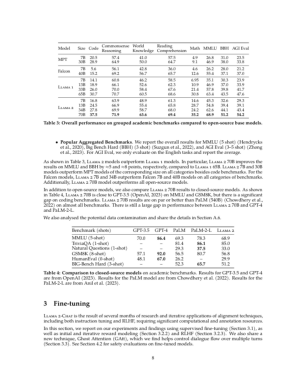

In [73]:
pdf2images("llama2_page8.pdf")
show_images("llama2_page8")

2. ËØÜÂà´ÊñáÊ°£ÔºàÂõæÁâáÔºâ‰∏≠ÁöÑË°®Ê†º

In [74]:
class MaxResize(object):
    '''Áº©ÊîæÂõæÂÉè'''
    def __init__(self, max_size=800):
        self.max_size = max_size

    def __call__(self, image):
        width, height = image.size
        current_max_size = max(width, height)
        scale = self.max_size / current_max_size
        resized_image = image.resize(
            (int(round(scale * width)), int(round(scale * height)))
        )

        return resized_image

In [ ]:
# !pip install torchvision -i https://pypi.mirrors.ustc.edu.cn/simple/
# !pip install transformers -i https://pypi.mirrors.ustc.edu.cn/simple/
# !pip install timm -i https://pypi.mirrors.ustc.edu.cn/simple/

In [75]:
import torchvision.transforms as transforms

# ÂõæÂÉèÈ¢ÑÂ§ÑÁêÜ
detection_transform = transforms.Compose(
    [
        MaxResize(800),
        # Â∞ÜÂéüÂßãÁöÑPILImageÊ†ºÂºèÁöÑÊï∞ÊçÆÊ†ºÂºèÂåñ‰∏∫ÂèØË¢´pytorchÂø´ÈÄüÂ§ÑÁêÜÁöÑÂº†ÈáèÁ±ªÂûã
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)

print(os.getenv("HF_ENDPOINT"))

https://hf-mirror.com


In [ ]:
# !huggingface-cli download "microsoft/table-transformer-detection"

In [76]:
from transformers import AutoModelForObjectDetection

# Âä†ËΩΩ TableTransformer Ê®°Âûã
model = AutoModelForObjectDetection.from_pretrained(
    "microsoft/table-transformer-detection"
)

Some weights of the model checkpoint at microsoft/table-transformer-detection were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [77]:
# ËØÜÂà´ÂêéÁöÑÂùêÊ†áÊç¢ÁÆó‰∏éÂêéÂ§ÑÁêÜ

def box_cxcywh_to_xyxy(x):
    '''ÂùêÊ†áËΩ¨Êç¢'''
    x_c, y_c, w, h = x.unbind(-1)
    b = [(x_c - 0.5 * w), (y_c - 0.5 * h), (x_c + 0.5 * w), (y_c + 0.5 * h)]
    return torch.stack(b, dim=1)


def rescale_bboxes(out_bbox, size):
    '''Âå∫ÂüüÁº©Êîæ'''
    width, height = size
    boxes = box_cxcywh_to_xyxy(out_bbox)
    boxes = boxes * torch.tensor(
        [width, height, width, height], dtype=torch.float32
    )
    return boxes


def outputs_to_objects(outputs, img_size, id2label):
    '''‰ªéÊ®°ÂûãËæìÂá∫‰∏≠ÂèñÂÆö‰ΩçÊ°ÜÂùêÊ†á'''
    m = outputs.logits.softmax(-1).max(-1)
    pred_labels = list(m.indices.detach().cpu().numpy())[0]
    pred_scores = list(m.values.detach().cpu().numpy())[0]
    pred_bboxes = outputs["pred_boxes"].detach().cpu()[0]
    pred_bboxes = [
        elem.tolist() for elem in rescale_bboxes(pred_bboxes, img_size)
    ]

    objects = []
    for label, score, bbox in zip(pred_labels, pred_scores, pred_bboxes):
        class_label = id2label[int(label)]
        if not class_label == "no object":
            objects.append(
                {
                    "label": class_label,
                    "score": float(score),
                    "bbox": [float(elem) for elem in bbox],
                }
            )

    return objects

In [78]:
import torch

# ËØÜÂà´Ë°®Ê†ºÔºåÂπ∂Â∞ÜË°®Ê†ºÈÉ®ÂàÜÂçïÁã¨Â≠ò‰∏∫ÂõæÂÉèÊñá‰ª∂

def detect_and_crop_save_table(file_path):
    # Âä†ËΩΩÂõæÂÉèÔºàPDFÈ°µÔºâ    
    image = Image.open(file_path)

    filename, _ = os.path.splitext(os.path.basename(file_path))

    # ËæìÂá∫Ë∑ØÂæÑ
    cropped_table_directory = os.path.join(os.path.dirname(file_path), "table_images")

    if not os.path.exists(cropped_table_directory):
        os.makedirs(cropped_table_directory)

    # È¢ÑÂ§ÑÁêÜ
    pixel_values = detection_transform(image).unsqueeze(0)

    # ËØÜÂà´Ë°®Ê†º
    with torch.no_grad():
        outputs = model(pixel_values)

    # ÂêéÂ§ÑÁêÜÔºåÂæóÂà∞Ë°®Ê†ºÂ≠êÂå∫Âüü
    id2label = model.config.id2label
    id2label[len(model.config.id2label)] = "no object"
    detected_tables = outputs_to_objects(outputs, image.size, id2label)

    print(f"number of tables detected {len(detected_tables)}")

    for idx in range(len(detected_tables)):
        # Â∞ÜËØÜÂà´‰ªéÁöÑË°®Ê†ºÂå∫ÂüüÂçïÁã¨Â≠ò‰∏∫ÂõæÂÉè
        cropped_table = image.crop(detected_tables[idx]["bbox"])
        cropped_table.save(os.path.join(cropped_table_directory,f"{filename}_{idx}.png"))

number of tables detected 2


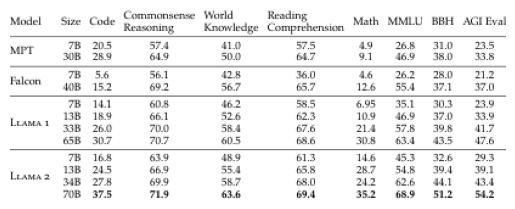

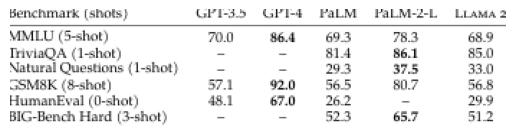

In [79]:
detect_and_crop_save_table("llama2_page8/page_1.png")
show_images("llama2_page8/table_images")

3. Âü∫‰∫é GPT-4 Vision API ÂÅöË°®Ê†ºÈóÆÁ≠î

In [80]:
import base64
from openai import OpenAI

client = OpenAI()

def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

def image_qa(query, image_path):
    base64_image = encode_image(image_path)
    response = client.chat.completions.create(
        model="gpt-4o",
        temperature=0,
        seed=42,
        messages=[{
            "role": "user",
              "content": [
                  {"type": "text", "text": query},
                  {
                      "type": "image_url",
                      "image_url": {
                          "url": f"data:image/jpeg;base64,{base64_image}",
                      },
                  },
              ],
        }],
    )

    return response.choices[0].message.content

In [81]:
response = image_qa("Âì™‰∏™Ê®°ÂûãÂú®AGI EvalÊï∞ÊçÆÈõÜ‰∏äË°®Áé∞ÊúÄÂ•Ω„ÄÇÂæóÂàÜÂ§öÂ∞ë","llama2_page8/table_images/page_1_0.png")
print(response)

Âú®AGI EvalÊï∞ÊçÆÈõÜ‰∏äË°®Áé∞ÊúÄÂ•ΩÁöÑÊ®°ÂûãÊòØLLaMA 2 70BÔºåÂæóÂàÜ‰∏∫54.2„ÄÇ


4. Áî® GPT-4 Vision ÁîüÊàêË°®Ê†ºÔºàÂõæÂÉèÔºâÊèèËø∞ÔºåÂπ∂ÂêëÈáèÂåñÁî®‰∫éÊ£ÄÁ¥¢

In [82]:
import chromadb
from chromadb.config import Settings


class NewVectorDBConnector:
    def __init__(self, collection_name, embedding_fn):
        chroma_client = chromadb.Client(Settings(allow_reset=True))

        # ‰∏∫‰∫ÜÊºîÁ§∫ÔºåÂÆûÈôÖ‰∏çÈúÄË¶ÅÊØèÊ¨° reset()
        chroma_client.reset()

        # ÂàõÂª∫‰∏Ä‰∏™ collection
        self.collection = chroma_client.get_or_create_collection(
            name=collection_name)
        self.embedding_fn = embedding_fn

    def add_documents(self, documents):
        '''Âêë collection ‰∏≠Ê∑ªÂä†ÊñáÊ°£‰∏éÂêëÈáè'''
        self.collection.add(
            embeddings=self.embedding_fn(documents),  # ÊØè‰∏™ÊñáÊ°£ÁöÑÂêëÈáè
            documents=documents,  # ÊñáÊ°£ÁöÑÂéüÊñá
            ids=[f"id{i}" for i in range(len(documents))]  # ÊØè‰∏™ÊñáÊ°£ÁöÑ id
        )

    def add_images(self, image_paths):
        '''Âêë collection ‰∏≠Ê∑ªÂä†ÂõæÂÉè'''
        documents = [
            image_qa("ËØ∑ÁÆÄË¶ÅÊèèËø∞ÂõæÁâá‰∏≠ÁöÑ‰ø°ÊÅØ",image)
            for image in image_paths
        ]
        self.collection.add(
            embeddings=self.embedding_fn(documents),  # ÊØè‰∏™ÊñáÊ°£ÁöÑÂêëÈáè
            documents=documents,  # ÊñáÊ°£ÁöÑÂéüÊñá
            ids=[f"id{i}" for i in range(len(documents))],  # ÊØè‰∏™ÊñáÊ°£ÁöÑ id
            metadatas=[{"image": image} for image in image_paths] # Áî® metadata Ê†áËÆ∞Ê∫êÂõæÂÉèË∑ØÂæÑ
        )

    def search(self, query, top_n):
        '''Ê£ÄÁ¥¢ÂêëÈáèÊï∞ÊçÆÂ∫ì'''
        results = self.collection.query(
            query_embeddings=self.embedding_fn([query]),
            n_results=top_n
        )
        return results

In [83]:
images = []
dir_path = "llama2_page8/table_images"
for file in os.listdir(dir_path):
    if file.endswith('.png'):
        # ÊâìÂºÄÂõæÂÉè
        images.append(os.path.join(dir_path, file))

new_db_connector = NewVectorDBConnector("table_demo",get_embeddings)
new_db_connector.add_images(images)

In [84]:
query  = "Âì™‰∏™Ê®°ÂûãÂú®AGI EvalÊï∞ÊçÆÈõÜ‰∏äË°®Áé∞ÊúÄÂ∑Æ„ÄÇÂæóÂàÜÂ§öÂ∞ë"

results = new_db_connector.search(query, 1)
metadata = results["metadatas"][0]
print("====Ê£ÄÁ¥¢ÁªìÊûú====")
print(metadata)
print("====ÂõûÂ§ç====")
response = image_qa(query,metadata[0]["image"])
print(response)

====Ê£ÄÁ¥¢ÁªìÊûú====
[{'image': 'llama2_page8/table_images/page_1_0.png'}]
====ÂõûÂ§ç====
Âú®AGI EvalÊï∞ÊçÆÈõÜ‰∏äË°®Áé∞ÊúÄÂ∑ÆÁöÑÊ®°ÂûãÊòØFalcon 7BÔºåÂæóÂàÜ‰∏∫21.2„ÄÇ


### ‰∏Ä‰∫õÈù¢Âêë RAG ÁöÑÊñáÊ°£Ëß£ÊûêËæÖÂä©Â∑•ÂÖ∑

- [PyMuPDF](https://pymupdf.readthedocs.io/en/latest/): PDF Êñá‰ª∂Â§ÑÁêÜÂü∫Á°ÄÂ∫ìÔºåÂ∏¶ÊúâÂü∫‰∫éËßÑÂàôÁöÑË°®Ê†º‰∏éÂõæÂÉèÊäΩÂèñÔºà‰∏çÂáÜÔºâ
- [RAGFlow](https://github.com/infiniflow/ragflow): ‰∏ÄÊ¨æÂü∫‰∫éÊ∑±Â∫¶ÊñáÊ°£ÁêÜËß£ÊûÑÂª∫ÁöÑÂºÄÊ∫ê RAG ÂºïÊìéÔºåÊîØÊåÅÂ§öÁßçÊñáÊ°£Ê†ºÂºèÔºàÁÅ´ÁàÜÔºâ
- [Unstructured.io](https://unstructured.io/): ‰∏Ä‰∏™ÂºÄÊ∫ê+SaaSÂΩ¢ÂºèÁöÑÊñáÊ°£Ëß£ÊûêÂ∫ìÔºåÊîØÊåÅÂ§öÁßçÊñáÊ°£Ê†ºÂºè
- [LlamaParse](https://docs.llamaindex.ai/en/stable/llama_cloud/llama_parse/)Ôºö‰ªòË¥π API ÊúçÂä°ÔºåÁî± LlamaIndex ÂÆòÊñπÊèê‰æõÔºåËß£Êûê‰∏ç‰øùËØÅ100%ÂáÜÁ°ÆÔºåÂÆûÊµãÂÅ∂ÊúâÊñáÂ≠ó‰∏¢Â§±ÊàñÈîô‰ΩçÂèëÁîü
- [Mathpix](https://mathpix.com/)Ôºö‰ªòË¥π API ÊúçÂä°ÔºåÊïàÊûúËæÉÂ•ΩÔºåÂèØËß£ÊûêÊÆµËêΩÁªìÊûÑ„ÄÅË°®Ê†º„ÄÅÂÖ¨ÂºèÁ≠âÔºåË¥µÔºÅ

Âú®Â∑•Á®ã‰∏äÔºåPDF Ëß£ÊûêÊú¨Ë∫´ÊòØ‰∏™Â§çÊùÇ‰∏îÁêêÁ¢éÁöÑÂ∑•‰Ωú„ÄÇ‰ª•‰∏äÂ∑•ÂÖ∑ÈÉΩ‰∏çÂÆåÁæéÔºåÂª∫ËÆÆÂú®Ëá™Â∑±ÂÆûÈôÖÂú∫ÊôØÊµãËØïÂêéÈÄâÊã©‰ΩøÁî®„ÄÇ

## ÂÖ≠„ÄÅËØ¥ËØ¥ GraphRAG

<img src="./assets/GraphRAG.png" style="margin-left: 0px" width="800px">

1. **‰ªÄ‰πàÊòØ GraphRAG**ÔºöÊ†∏ÂøÉÊÄùÊÉ≥ÊòØÂ∞ÜÁü•ËØÜÈ¢ÑÂÖàÂ§ÑÁêÜÊàêÁü•ËØÜÂõæË∞±
2. **‰ºòÁÇπ**ÔºöÈÄÇÂêàÂ§çÊùÇÈóÆÈ¢òÔºåÂ∞§ÂÖ∂ÊòØ‰ª•Êü•ËØ¢‰∏∫‰∏≠ÂøÉÁöÑÊÄªÁªìÔºå‰æãÂ¶ÇÔºö‚ÄúXXXÂõ¢ÈòüÂéªÂπ¥ÊúâÂì™‰∫õË¥°ÁåÆ‚Äù
3. **Áº∫ÁÇπ**ÔºöÁü•ËØÜÂõæË∞±ÁöÑÊûÑÂª∫„ÄÅÊ∏ÖÊ¥ó„ÄÅÁª¥Êä§Êõ¥Êñ∞Á≠âÈÉΩÊúâÂèØËßÇÁöÑÊàêÊú¨
4. **Âª∫ËÆÆ**Ôºö
   - GraphRAG ‰∏çÊòØ‰∏áËÉΩËâØËçØ
   - È¢Ü‰ºöÂÖ∂Ê†∏ÂøÉÊÄùÊÉ≥
   - ÈÅáÂà∞‰º†Áªü RAG Êó†ËÆ∫Â¶Ç‰Ωï‰ºòÂåñÈÉΩ‰∏çÂ•ΩËß£ÂÜ≥ÁöÑÈóÆÈ¢òÊó∂ÔºåÈÖåÊÉÖ‰ΩøÁî®

## ÊÄªÁªì

### RAG ÁöÑÊµÅÁ®ã

- Á¶ªÁ∫øÊ≠•È™§Ôºö
  1. ÊñáÊ°£Âä†ËΩΩ
  2. ÊñáÊ°£ÂàáÂàÜ
  3. ÂêëÈáèÂåñ
  4. ÁÅåÂÖ•ÂêëÈáèÊï∞ÊçÆÂ∫ì
- Âú®Á∫øÊ≠•È™§Ôºö
  1. Ëé∑ÂæóÁî®Êà∑ÈóÆÈ¢ò
  2. Áî®Êà∑ÈóÆÈ¢òÂêëÈáèÂåñ
  3. Ê£ÄÁ¥¢ÂêëÈáèÊï∞ÊçÆÂ∫ì
  4. Â∞ÜÊ£ÄÁ¥¢ÁªìÊûúÂíåÁî®Êà∑ÈóÆÈ¢òÂ°´ÂÖ• Prompt Ê®°Áâà
  5. Áî®ÊúÄÁªàËé∑ÂæóÁöÑ Prompt Ë∞ÉÁî® LLM
  6. Áî± LLM ÁîüÊàêÂõûÂ§ç

### ÊàëÁî®‰∫Ü‰∏Ä‰∏™ÂºÄÊ∫êÁöÑ RAGÔºå‰∏çÂ•Ω‰ΩøÊÄé‰πàÂäûÔºü

1. Ê£ÄÊü•È¢ÑÂ§ÑÁêÜÊïàÊûúÔºöÊñáÊ°£Âä†ËΩΩÊòØÂê¶Ê≠£Á°ÆÔºåÂàáÂâ≤ÁöÑÊòØÂê¶ÂêàÁêÜ
2. ÊµãËØïÊ£ÄÁ¥¢ÊïàÊûúÔºöÈóÆÈ¢òÊ£ÄÁ¥¢ÂõûÊù•ÁöÑÊñáÊú¨ÁâáÊÆµÊòØÂê¶ÂåÖÂê´Á≠îÊ°à
3. ÊµãËØïÂ§ßÊ®°ÂûãËÉΩÂäõÔºöÁªôÂÆöÈóÆÈ¢òÂíåÂåÖÂê´Á≠îÊ°àÊñáÊú¨ÁâáÊÆµÁöÑÂâçÊèê‰∏ãÔºåÂ§ßÊ®°ÂûãËÉΩ‰∏çËÉΩÊ≠£Á°ÆÂõûÁ≠îÈóÆÈ¢ò

## ‰Ωú‰∏ö

ÂÅö‰∏™Ëá™Â∑±ÁöÑ ChatPDF„ÄÇÈúÄÊ±ÇÔºö

1. ‰ªéÊú¨Âú∞Âä†ËΩΩ PDF Êñá‰ª∂ÔºåÂü∫‰∫é PDF ÁöÑÂÜÖÂÆπÂØπËØù
2. ÂèØ‰ª•Êó†ÂâçÁ´ØÔºåÂè™Ë¶ÅËÉΩÂú®ÂëΩ‰ª§Ë°åËøêË°åÂ∞±Ë°å
3. ÂÖ∂ÂÆÉÈöèÊÑèÂèëÊå•